##Energy Efficiency - Predict the Heating and Cooling Load required for the building

##Steps:

1.Import necessary libraries

2.Load Data

3.Data Preprocessing

     Rename Columns

     Check whether the data contain any missing values

4.Exploratory Data Analysis and Feature Selection
 
     Summary Table

     Histogram

     Density Plots

     Scatter Plots

     Outlier Detection

     Log transformation on heating load and cooling load to make them 
     more normalised in term of distribution

     correlation matrix

5.MODELLING

     Modelling for Heating Load
     
        Multiple Linear Regression Model

        Decision Tree Regression

        Random Forest Regression

        Model Comparison and Select best model as Random Forest      
        Regression for Heating Load 

     Modelling for Cooling Load

        Random Forest Regression model for Cooling Load 

###Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

## Reading the data.

In [3]:
data=pd.read_csv("ENB2012_data.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


##Rename Columns:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

In [4]:
data = data.rename(columns = { 'X1': 'Relative_Compactness',
                           'X2': 'Surface_Area',
                           'X3': 'Wall_Area',
                           'X4': 'Roof_Area',
                           'X5': 'Overall_Height',
                           'X6': 'Orientation',
                           'X7': 'Glazing_Area',
                           'X8': 'Glazing_Area_Distribution',
                           'Y1': 'Heating_Load',
                           'Y2': 'Cooling_Load'})

In [5]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.shape

(768, 10)

### Check whether the data contain any missing values.

In [8]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

#Exploratory Data Analysis

This section will explore data through summary table, histogram and correlation matrix to understand the data, explore the relationship between the variables

Summary Table

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


Histogram

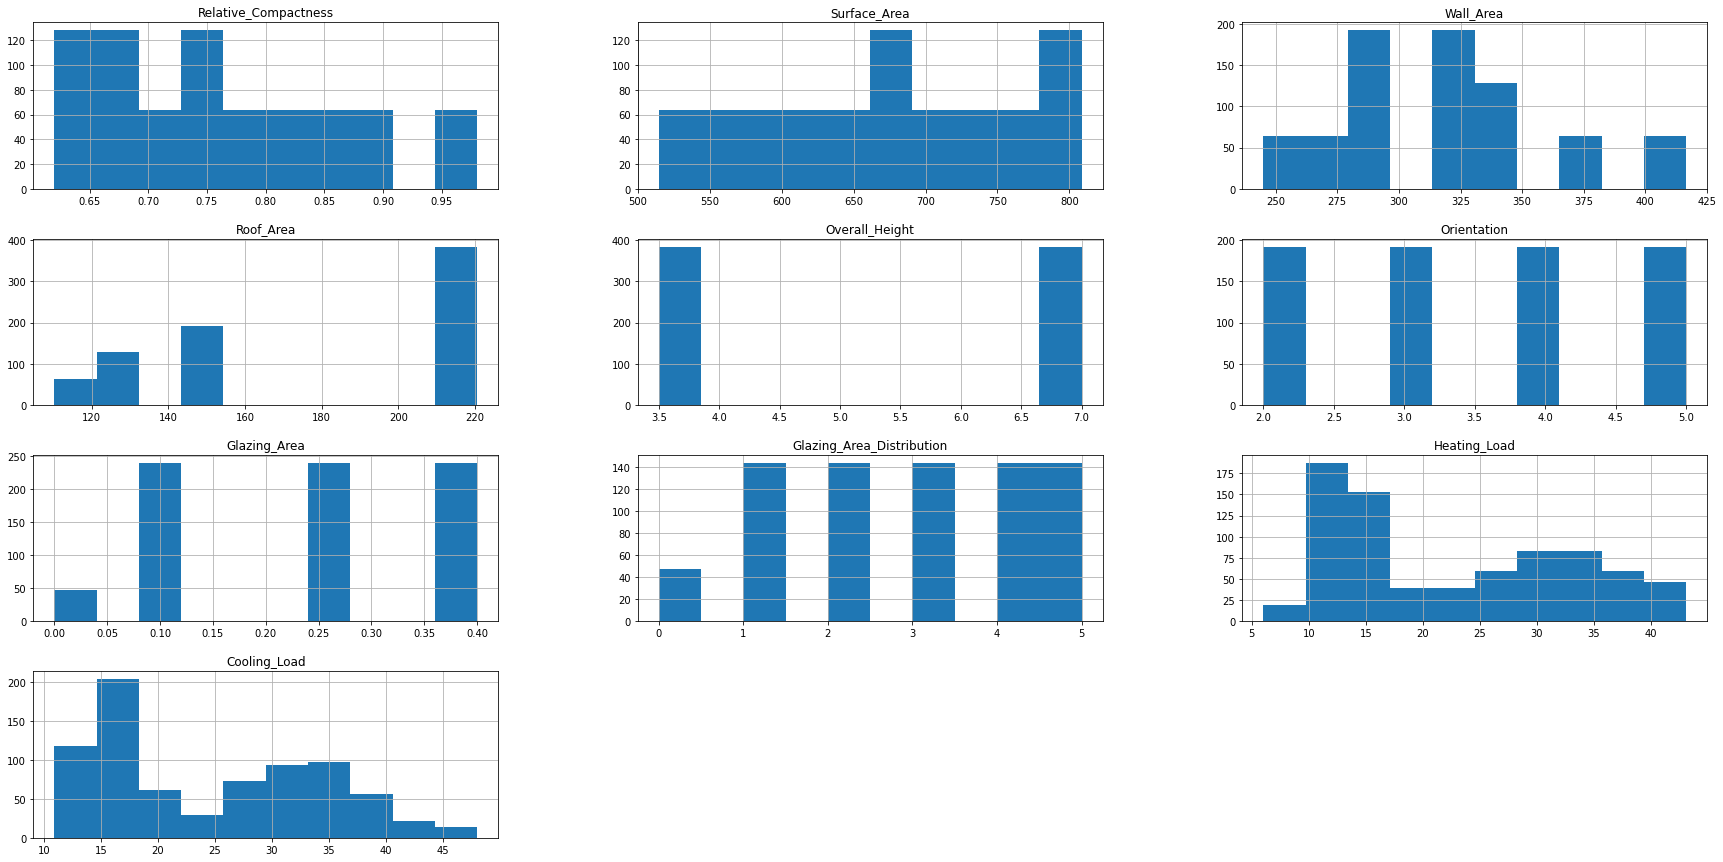

In [10]:
# Histogram
data.hist(figsize = (30,15))
plt.show()

##Density Plots

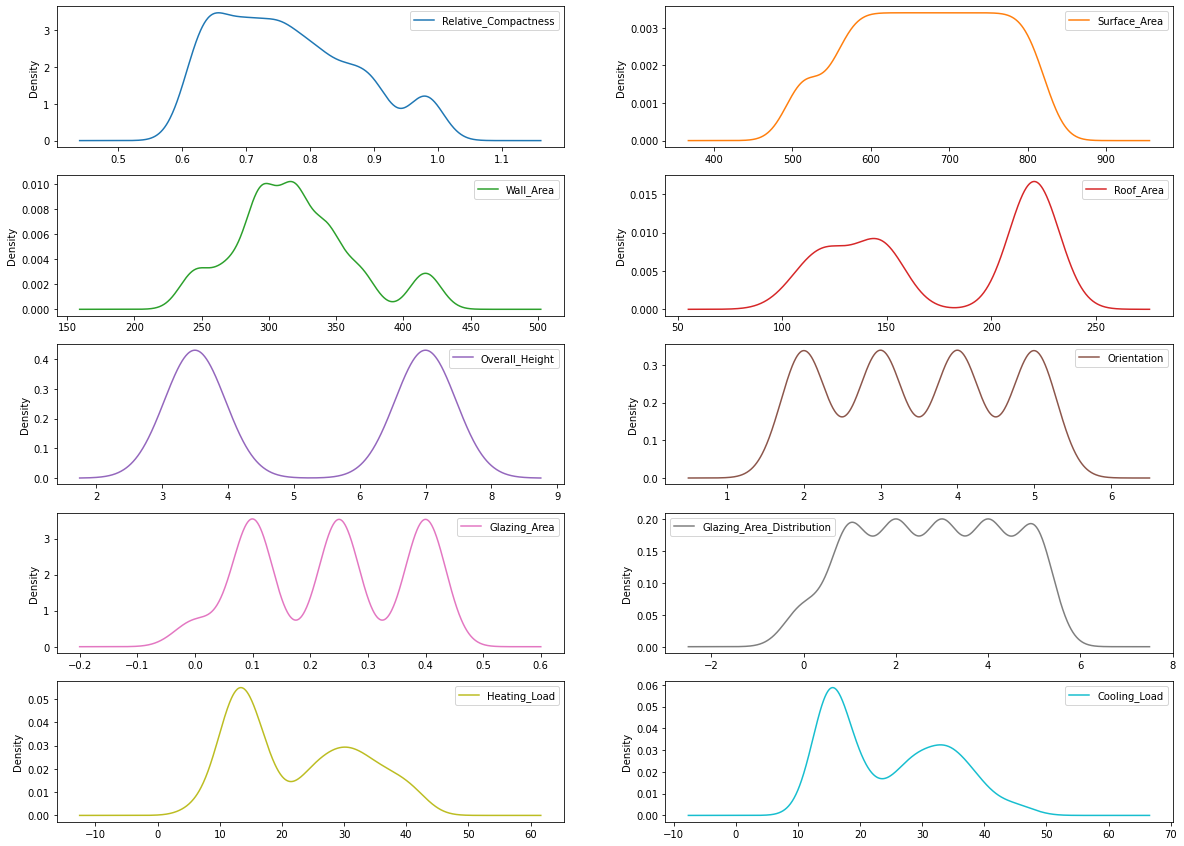

In [11]:
data.plot(kind='density', subplots=True, layout=(5,2), figsize=(20, 15), sharex=False)
plt.show()

Looking at heating load and cooling, they seem to be heavily skewed to the right. Therefore, log transformation will be done on heating load and cooling load to make them more normalised in term of distribution

##Scatter and density plots:

In [12]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
#sns.pairplot(data, kind="scatter", diag_kind='kde')

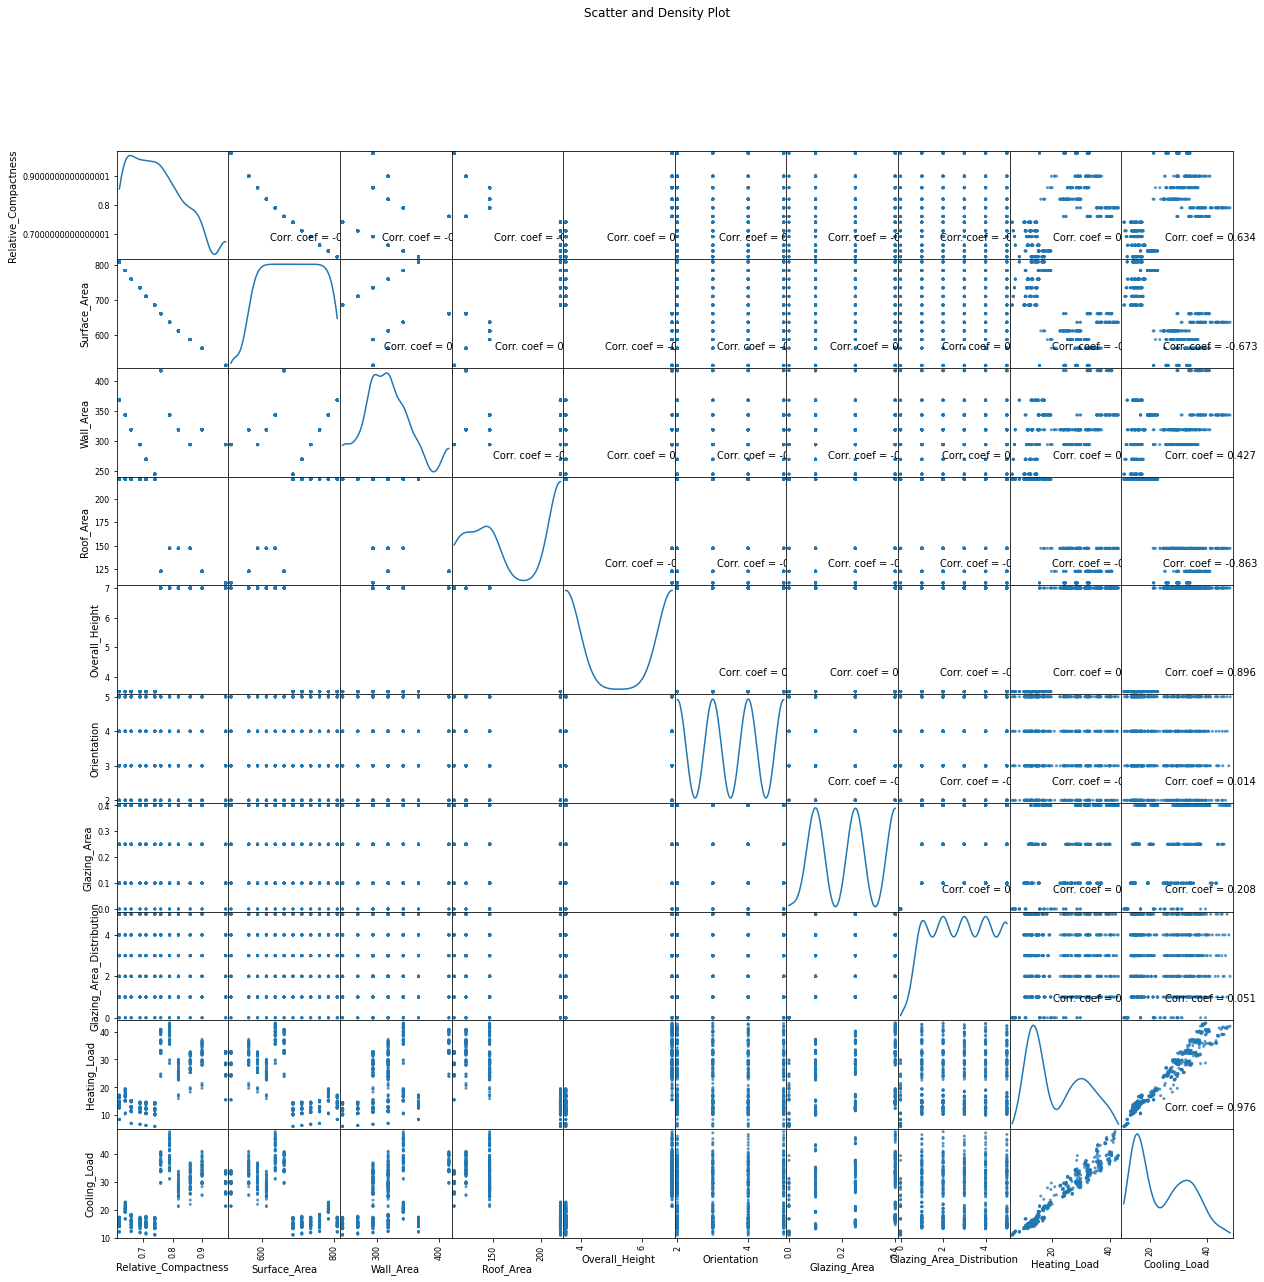

In [13]:
plotScatterMatrix(data, 20, 10)

##Outlier Detection


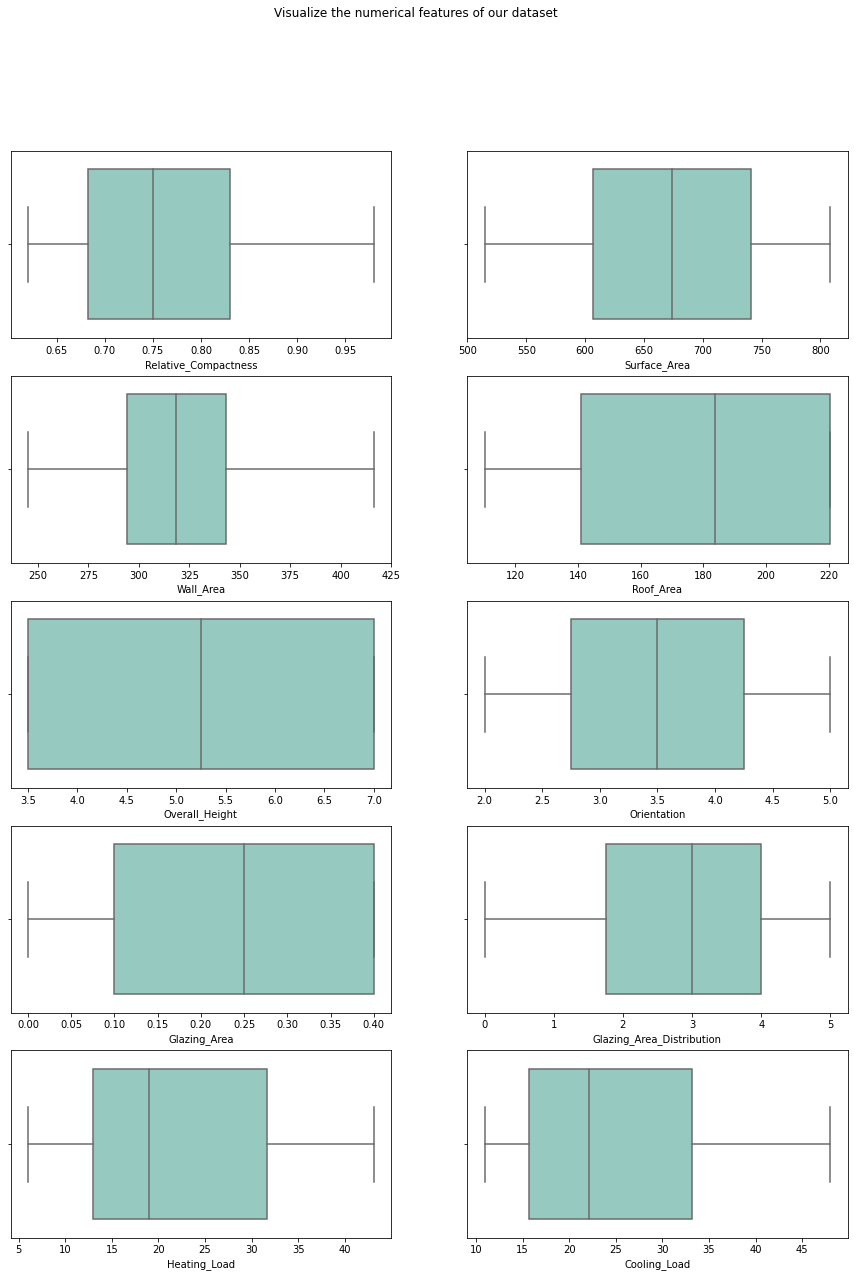

In [14]:
fig, axes = plt.subplots( figsize=(15, 20))
fig.suptitle('Visualize the numerical features of our dataset')

plt.subplot(5,2,1)
sns.boxplot(x=data["Relative_Compactness"],palette='Set3')

plt.subplot(5,2,2)
sns.boxplot(x=data["Surface_Area"],palette='Set3')

plt.subplot(5,2,3)
sns.boxplot(x=data["Wall_Area"],palette='Set3')

plt.subplot(5,2,4)
sns.boxplot(x=data["Roof_Area"],palette='Set3')

plt.subplot(5,2,5)
sns.boxplot(x=data["Overall_Height"],palette='Set3')

plt.subplot(5,2,6)
sns.boxplot(x=data["Orientation"],palette='Set3')

plt.subplot(5,2,7)
sns.boxplot(x=data["Glazing_Area"],palette='Set3')

plt.subplot(5,2,8)
sns.boxplot(x=data["Glazing_Area_Distribution"],palette='Set3')

plt.subplot(5,2,9)
sns.boxplot(x=data["Heating_Load"],palette='Set3')

plt.subplot(5,2,10)
sns.boxplot(x=data["Cooling_Load"],palette='Set3')

plt.show()


###Inferences from the boxplot:

No outliers in all columns.

##Log transformation on heating load and cooling load to make them more normalised in term of distribution

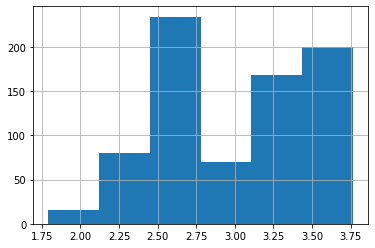

In [15]:
data["log_Heating_Load"]=np.log(data["Heating_Load"])
data["log_Heating_Load"].hist(bins=6)
plt.show()

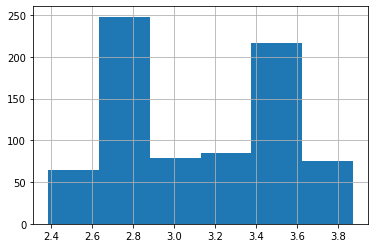

In [16]:
data["log_Cooling_Load"]=np.log(data["Cooling_Load"])
data["log_Cooling_Load"].hist(bins=6)
plt.show()

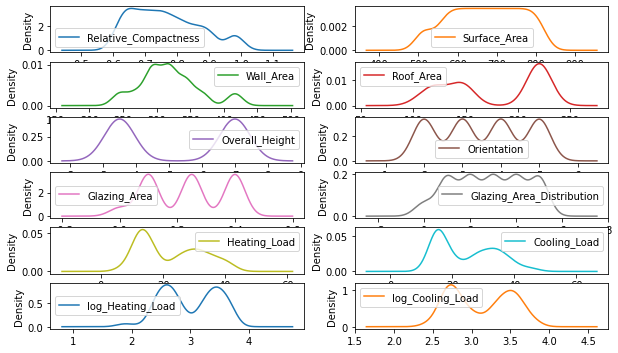

In [29]:
data.plot(kind='density', subplots=True, layout=(10,2), figsize=(10, 10), sharex=False)
plt.show()

we can see heating load and cooling load more normalised in term of distribution after log transformation 

In [30]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,log_Heating_Load,log_Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,2.744061,3.060115
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,2.744061,3.060115
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,2.744061,3.060115
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,2.744061,3.060115
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,3.036874,3.342155


##Correlation Analysis

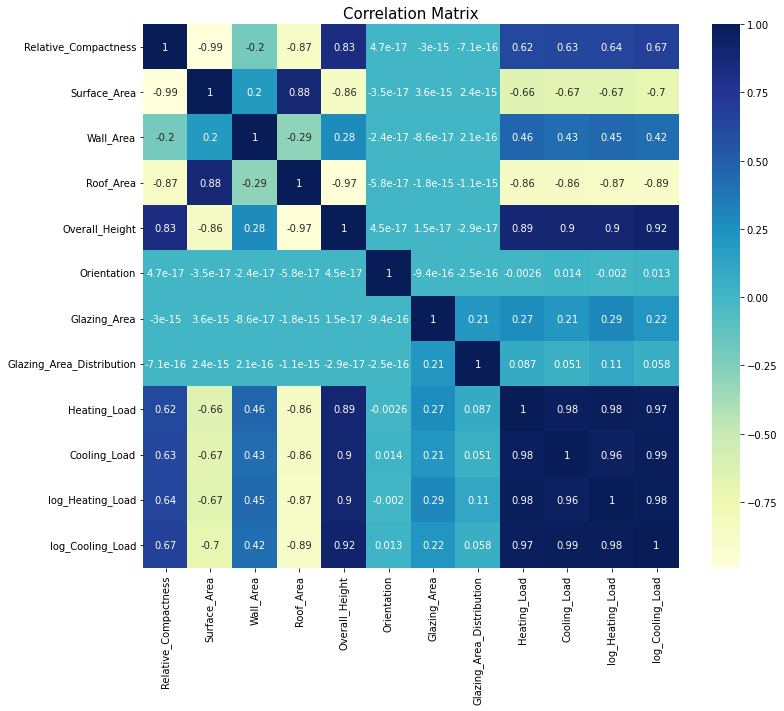

In [31]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

High Correlation:

    1. Relative_Compactness, Surface_Area and Roof_Area
    2. Surface Area and Overall_Height 
    3. Overall_Height and Roof_Area
High Correlation create chances of overfitting.
But, we don't eliminate any feature now, because it is a small dataset

In [68]:
#data = data.drop(['Surface_Area','Overall_Height'],axis=1)
#data

,Relative_Compactness,Wall_Area,Roof_Area,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,294.0,110.25,2,0.0,0,15.55,21.33
1,0.98,294.0,110.25,3,0.0,0,15.55,21.33
2,0.98,294.0,110.25,4,0.0,0,15.55,21.33
3,0.98,294.0,110.25,5,0.0,0,15.55,21.33
4,0.90,318.5,122.50,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...
763,0.64,343.0,220.50,5,0.4,5,17.88,21.40
764,0.62,367.5,220.50,2,0.4,5,16.54,16.88
765,0.62,367.5,220.50,3,0.4,5,16.44,17.11
766,0.62,367.5,220.50,4,0.4,5,16.48,16.61


Correlation between heating load and cooling load

No handles with labels found to put in legend.


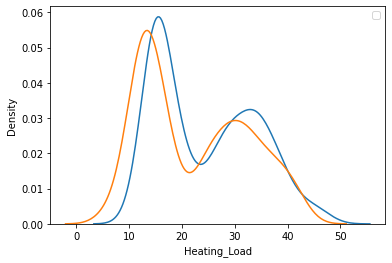

In [32]:
sns.distplot(data['Cooling_Load'],hist=False)
sns.distplot(data['Heating_Load'],hist=False)
plt.legend()
plt.show()

Heating load and Cooling load are highly correlated, so we can train the models for Cooling Load and HeatingLoad with same method.

##MODELLING

Define x and y variables

In [33]:
X = data.drop(['Heating_Load','Cooling_Load','log_Heating_Load','log_Cooling_Load'],axis=1) #Independend features use for both Heating_Load model and Cooling_Load model
y1 = data['log_Heating_Load']   #Dependend feature use for train Heating_Load model
y2 = data['log_Cooling_Load']   #Dependend feature use for train Cooling_Load model

##Modelling for Heating Load

Split data into training and test set for Heating Load model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_Heat, y_test_Heat = train_test_split(X, y1, test_size = 0.2, random_state = 42)

##Multiple Linear Regression Model

In [41]:
regressor_LR_Heat= LinearRegression()
regressor_LR_Heat.fit(X_train, y_train_Heat)
y_pred_LR_Heat = regressor_LR_Heat.predict(X_test)

In [51]:
r2_score_LR_Heat = r2_score(y_test_Heat, y_pred_LR_Heat)
r2_score_LR_Heat

0.9332346431870889

In [54]:
print("R2 Score for Test set:",r2_score(y_test_Heat, y_pred_LR_Heat))
print("Adjusted R-squared value Test set:",1 - (1-r2_score_LR_Heat)*(len(y_test_Heat)-1)/(len(y_test_Heat)-X_test.shape[1]-1))
print("RMSE for Test set:",MSE(y_pred_LR_Heat, y_test_Heat,squared=False))

R2 Score for Test set: 0.9332346431870889
Adjusted R-squared value Test set: 0.9295510372939628
RMSE for Test set: 0.12559974514293934


##Decision Tree Regression

In [56]:
regressor_DT_Heat = DecisionTreeRegressor()
regressor_DT_Heat.fit(X_train, y_train_Heat)
y_pred_DT_Heat = regressor_DT_Heat.predict(X_test)

In [57]:
r2_score_DT_Heat = r2_score(y_test_Heat, y_pred_DT_Heat)
r2_score_DT_Heat

0.9972588849477569

In [60]:
print("R2 Score for Test set:",r2_score_DT_Heat)
print("Adjusted R-squared value Test set:",1 - (1-r2_score_DT_Heat)*(len(y_test_Heat)-1)/(len(y_test_Heat)-X_test.shape[1]-1))
print("RMSE for Test set:",MSE(y_test_Heat, y_pred_DT_Heat,squared=False))

R2 Score for Test set: 0.9972588849477569
Adjusted R-squared value Test set: 0.9971076510138401
RMSE for Test set: 0.025449356369945338


##Random Forest Regression

In [61]:
regressor_RF_Heat = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor_RF_Heat.fit(X_train, y_train_Heat)
y_pred_RF_Heat = regressor_RF_Heat.predict(X_test)

In [62]:
r2_score_RF_Heat = r2_score(y_test_Heat, y_pred_RF_Heat)

In [64]:
print("R2 Score for Test set:",r2_score_RF_Heat)
print("Adjusted R-squared value Test set:",1 - (1-r2_score_RF_Heat)*(len(y_test_Heat)-1)/(len(y_test_Heat)-X_test.shape[1]-1))
print("RMSE for Test set:",MSE(y_test_Heat, y_pred_RF_Heat,squared=False))

R2 Score for Test set: 0.9977930011339894
Adjusted R-squared value Test set: 0.9976712356793129
RMSE for Test set: 0.022835694589424877


##Insert independent features into RF Heating model for testing

In [65]:
ans = regressor_RF_Heat.predict([[0.98,514.5,294.0,110.25,7.0,3,0.0,0]])

In [66]:
ans #answer is log, convert to antilog

array([2.80848666])

In [67]:
#answer convert to antilog
import math

math.exp(ans)

16.58480074803983

##Conclusion about Model Selection for Heating Load

Here, created Three models, they are Linear Regression, Decision Tree Regression and Random Forest Regressor.

Compare the Adjusted R-squared value and root mean squared error. The algorithm having a better Adjusted R-squared value and root mean squared error shall be considered for create model.

Here we find the best model as Random Forest Regression model with 
##Adjusted R-squared value = 0.9976 and RMSE = 0.022

##save the RF Heatinging model to disk

In [68]:
# Creating a pickle file for the model
import pickle
filename = 'Energy_Efficiency_RF_Heating.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))

##Modelling for Cooling Load

Split data into training and test set for Cooling Load

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_Cool, y_test_Cool = train_test_split(X, y2, test_size = 0.2, random_state = 42)

We choose Random Forest Regression model for Heating load, then we choose same model for Cooling load. Because Heating load and Cooling load have almost same distriution and highly correlated.

##Random Forest Regression for Cooling Load

In [71]:
regressor_RF_Cool = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor_RF_Cool.fit(X_train, y_train_Cool)
y_pred_RF_Cool = regressor_RF_Cool.predict(X_test)

In [73]:
r2_score_RF_Cool = r2_score(y_test_Cool, y_pred_RF_Cool)
r2_score_RF_Cool

0.9792923489648052

In [75]:
print("R2 Score for Test set:",r2_score_RF_Cool)
print("Adjusted R-squared value Test set:",1 - (1-r2_score_RF_Cool)*(len(y_test_Cool)-1)/(len(y_test_Cool)-X_test.shape[1]-1))
print("RMSE for Test set:",MSE(y_test_Cool, y_pred_RF_Cool,squared=False))

R2 Score for Test set: 0.9792923489648052
Adjusted R-squared value Test set: 0.9781498578732083
RMSE for Test set: 0.05731039273839658


####Insert independent features into RF Cooling model for testing

In [76]:
ans_cool = regressor_RF_Cool.predict([[0.98,514.5,294.0,110.25,7.0,3,0.0,0]])

In [78]:
#answer is log format. convert to antilog
ans_cool

array([3.06011453])

In [79]:
#antilog conversion
import math

math.exp(ans_cool)

21.32999999999999

Here, the RF cooling model as Random Forest Regression model with

##Adjusted R-squared value = 0.978 and RMSE = 0.057

##save the RF_Cooling model to disk

In [80]:
# Creating a pickle file for the model
import pickle
filename = 'Energy_Efficiency_RF_Cooling.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))